<a href="https://colab.research.google.com/github/jothikajayavelu/Deep-learning-imagedetection-project/blob/main/DL_imagedetection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [2]:
TRAIN_DIR = '/content/train data'
TEST_DIR = '/content/test data'

In [3]:
IMG_SIZE = 120
MODEL_NAME = 'nikevsadidas'

In [4]:
def label_image(img):
  word_label = img.split('_')[0]
  if word_label == 'nike': return [1,0]
  elif word_label == 'adidas': return [0,1]

In [5]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL
  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
  #Create composite image by blending images using a transparency mask. ..
  # ANTIALIAS (a high-quality downsampling filter).

  train_data.append([np.array(img), np.array(label)])

shuffle(train_data)

100%|██████████| 12/12 [00:00<00:00, 99.02it/s] 


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

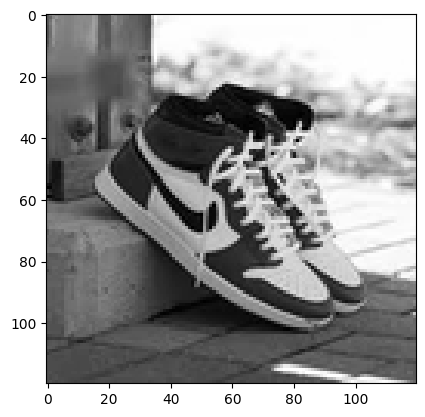

In [7]:
plt.imshow(train_data[2][0], cmap='gist_gray')
plt.show()

In [8]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [9]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4167 - loss: 2.4234
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 5.1753
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 189.4318
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 11.1781
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 7.4944
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 2.3048
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.6275
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6983
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 0.6482
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6219


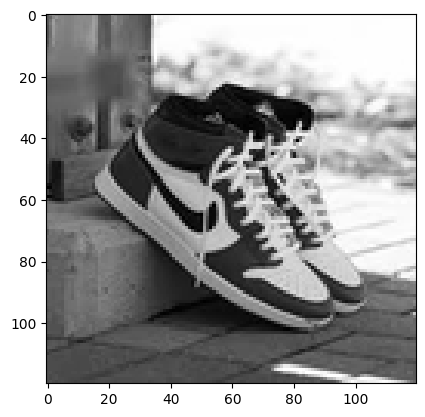

In [11]:
# PIL
img = Image.open('/content/test data/nike_1.jpg')
img = img.convert('L')

img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [12]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


array([[0.5678783, 0.4321217]], dtype=float32)